In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt  # Import the necessary library
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
import pandas as pd

# Load the Mushroom dataset
df = pd.read_csv('/content/mushroom.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.info())

# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical Columns: {categorical_cols}')

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame and its columns
print(df_encoded.head())
print(df_encoded.columns)

# Set the target variable correctly
# Use 'class_poisonous' as the target variable for classification
X = df_encoded.drop(['class_poisonous'], axis=1)  # Dropping the target variable from features
y = df_encoded['class_poisonous']  # Using 'class_poisonous' as the target variable

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame and its columns
print(df_encoded.head())
print(df_encoded.columns)

# Set the target variable correctly
# Use 'class_poisonous' as the target variable for classification
X = df_encoded.drop(['class_poisonous'], axis=1)  # Dropping the target variable from features
y = df_encoded['class_poisonous']  # Using 'class_poisonous' as the target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits to confirm
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

   Unnamed: 0  stalk_height  cap_diameter  cap_shape_conical  \
0        1167     14.276173      5.054983              False   
1        1037      3.952715     19.068319              False   
2         309      9.054265      7.205884              False   
3         282      5.226499     20.932692              False   
4         820     14.037532     12.545245              False   

   cap_shape_convex  cap_shape_flat  cap_shape_sunken  cap_surface_grooves  \
0             False           False              True                False   
1             False           False              True                False   
2             False            True             False                 True   
3             False           False             False                False   
4             False            True             False                False   

   cap_surface_scaly  cap_surface_smooth  ...  population_scattered  \
0               True               False  ...                 False   
1   

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

# Implementing SVM classifier
svm_model = svm.SVC(kernel='linear')  # Change kernel type as needed
svm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.55      0.12      0.20       133
        True       0.68      0.95      0.80       267

    accuracy                           0.68       400
   macro avg       0.62      0.54      0.50       400
weighted avg       0.64      0.68      0.60       400

[[ 16 117]
 [ 13 254]]


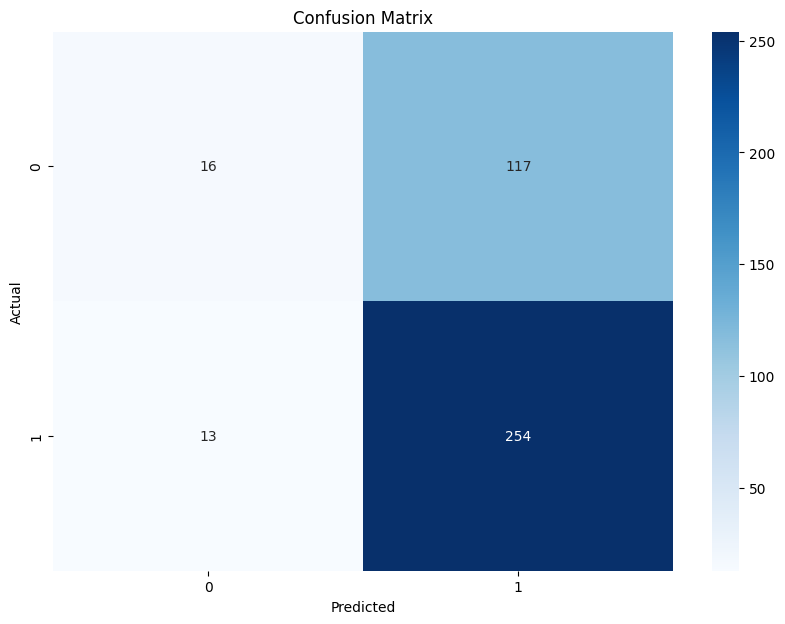

In [ ]:
# Visualizing classification results
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time= 2.7min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.3min
[CV] END ...............................C=0.1, kernel=linear; total time= 2.5min
[CV] END ...............................C=0.1, kernel=linear; total time= 1.6min
[CV] END ...............................C=0.1, kernel=linear; total time= 5.7min
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END .................................C=0.1, kernel=poly; total time=   0.1s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.1s
[CV] END ..................................C=0.1

In [ ]:
# Compare SVM performance with various kernels
for kernel in ['linear', 'poly', 'rbf']:
    svm_model = svm.SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f'Performance for kernel: {kernel}')
    print(classification_report(y_test, y_pred))
